<a href="https://colab.research.google.com/github/isaiascabreraa/TP1-OrganizacionDeDatos/blob/main/Visualizaciones/HEATMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
infoplay = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore.csv")
inforeviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore_user_reviews.csv")

In [ ]:
infoplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
inforeviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
44255,Fantasy Football Manager (FPL),Fantastic,Positive,0.400000,0.900000
44256,Fantasy Football Manager (FPL),"phone language arabic flopped , please pix it....",Positive,0.100000,0.200000
44257,Fantasy Football Manager (FPL),I think system whereby defensive midfielders g...,Neutral,0.000000,0.000000
44258,Fantasy Football Manager (FPL),"Pretty simple fast, gets job done. No complain...",Positive,0.113889,0.670635


In [ ]:
#Queremos utilizar datos que se encuentren (a la vez) en dos dataframe diferentes asi que hacemos merge

In [ ]:
merged_info = pd.merge(infoplay, inforeviews, on='App', how='inner')
merged_info

In [ ]:
inforeviews['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
inforeviews = inforeviews.dropna(subset=['Sentiment']) #Le quito los valores nulos

In [ ]:
heapmap = merged_info[['Category','Reviews','Sentiment']]

In [ ]:
heapmap.rename(columns={'Sentiment': 'Opinion'}, inplace=True)

In [ ]:
heapmap['Reviews'].unique()

In [ ]:
#heapmap es tipo objetct y quisiera asegurarme que sean de tipo numerico asi que los convierto y lo que no se pudo convertir lo quito.
heapmap["Reviews"] = pd.to_numeric(heapmap["Reviews"], errors='coerce')
heapmap = heapmap.dropna(subset=["Reviews"])
heapmap['Reviews'].describe()

In [ ]:
heapmap['Category'].unique()

array(['ART AND DESIGN', 'FAMILY', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMMUNICATION', 'COMICS',
       'DATING', 'TOOLS', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS',
       'FINANCE', 'FOOD AND DRINK', 'HEALTH AND FITNESS',
       'HOUSE AND HOME', 'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME',
       'SPORTS', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY',
       'TRAVEL AND LOCAL', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'VIDEO PLAYERS', 'NEWS AND MAGAZINES',
       'MAPS AND NAVIGATION'], dtype=object)

In [ ]:
#Quito los _ para una mejora visibilidad en el grafico
heapmap['Category'] = heapmap['Category'].str.replace('_',' ')

In [ ]:
heapmap['Category'].unique()

array(['ART AND DESIGN', 'FAMILY', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMMUNICATION', 'COMICS',
       'DATING', 'TOOLS', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS',
       'FINANCE', 'FOOD AND DRINK', 'HEALTH AND FITNESS',
       'HOUSE AND HOME', 'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME',
       'SPORTS', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY',
       'TRAVEL AND LOCAL', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING',
       'WEATHER', 'VIDEO PLAYERS', 'NEWS AND MAGAZINES',
       'MAPS AND NAVIGATION'], dtype=object)

In [ ]:
heapmap["Category"] = heapmap["Category"].explode("Category")
table = heapmap.pivot_table(values='Reviews',index='Category',columns='Opinion',aggfunc='mean',fill_value=0)
table

Opinion,Negative,Neutral,Positive
Category,,,
ART AND DESIGN,0.761531,0.751746,0.769775
AUTO AND VEHICLES,0.771992,0.756661,0.784442
BEAUTY,0.772157,0.765058,0.771080
BOOKS AND REFERENCE,0.823793,0.814581,0.816716
BUSINESS,0.806616,0.803032,0.798477
COMICS,0.800753,0.787446,0.798536
COMMUNICATION,0.823165,0.822325,0.823653
DATING,0.777674,0.778509,0.778776
EDUCATION,0.832359,0.814360,0.835277


In [ ]:
#Notamos que la mayoria de valores son mas cercanos a lo "chico" y solo unos pocos tienen un valor exorbitante entonces aplicamos un logaritmos
# a todos los elementos de review. La transformación logarítmica nos es útil ya que los datos tienen una amplia gama de valores y deseamos resaltar
# las diferencias en los valores más pequeños mientras controlamos la escala de los valores más grandes.
heapmap['Reviews'] = np.log1p(heapmap['Reviews'])

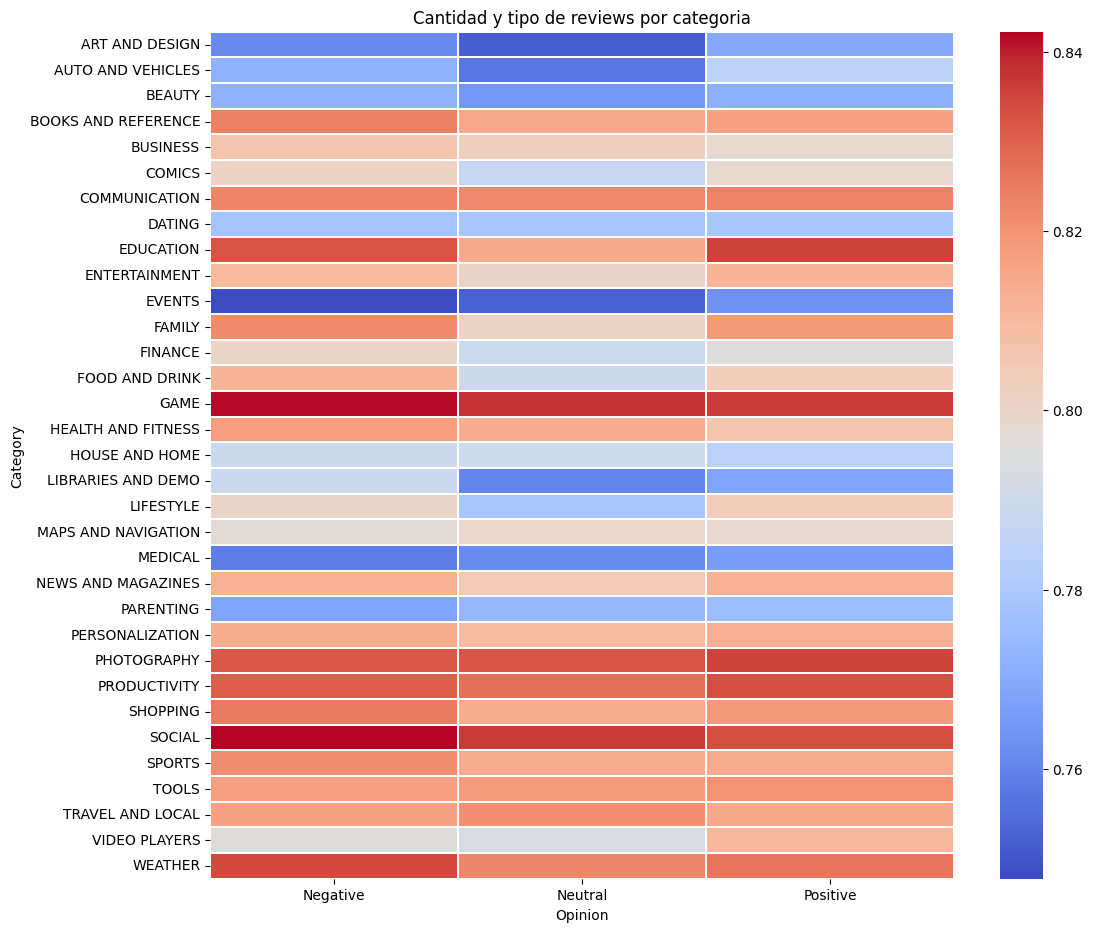

In [ ]:
plt.figure(figsize=(12, 11))
mi_paleta = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(table, cmap= mi_paleta, square=False, linewidths=0.01)
plt.title("Cantidad y tipo de reviews por categoria")
plt.show()